In [1]:
from mxnet import nd,gluon,autograd
import matplotlib.pyplot as plt
# %matplotlib notebook

In [2]:
def plot(xs,i,sample_size=30):
    plotxs=xs[:sample_size,:]
    plotxn=xs[:sample_size,1].asnumpy()
    yhat=net(plotxs).asnumpy()
    ax[i//3,i-3*(i//3)].plot(plotxn,yhat,'ro',label='True')

    ys=nd.dot(plotxs,true_w)+true_b
    ax[i//3,i-3*(i//3)].plot(plotxn,ys.asnumpy(),'y*',label='predict')
    ax[i//3,i-3*(i//3)].grid(True)
    if i==0:
        ax[i//3,i-3*(i//3)].legend(loc='upper left')

In [3]:
true_w=nd.array([3,100])
true_b=nd.array([1.3])
def getDataSet():
    xs=nd.random_normal(shape=(600,2))
    ys=nd.dot(xs,true_w)+true_b
    ys+=0.01*nd.random_normal(shape=ys.shape)
    return xs,ys
xs,ys=getDataSet()
dataset=gluon.data.ArrayDataset(xs,ys)
data_iter=gluon.data.DataLoader(dataset,batch_size=30,shuffle=True)

In [4]:
net=gluon.nn.Sequential()
net.add(gluon.nn.Dense(1))
net.initialize()
dense=net[0]

In [5]:
square_loss=gluon.loss.L2Loss()

In [6]:
trainer=gluon.Trainer(dense.params,'sgd',{'learning_rate':0.1})

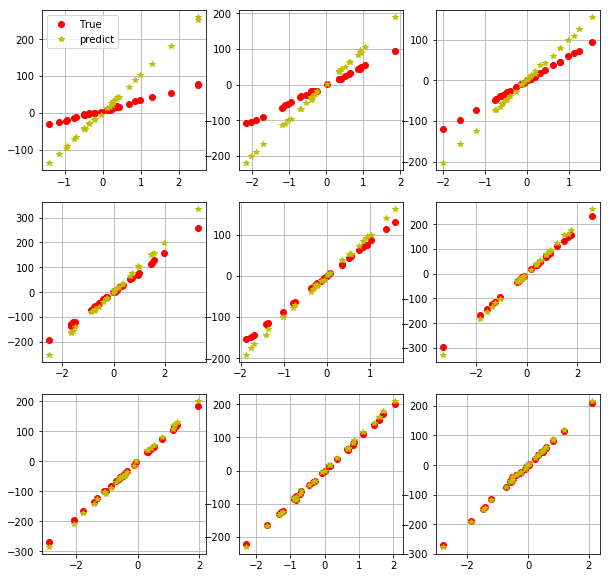

In [7]:
epochs=10
i=0
j=0
fig,ax=plt.subplots(3,3,figsize=(10, 10)) 
for e in range(epochs):
    for x,y in data_iter:          #计算出所有数据的损失
        with autograd.record():
            yhat=net(x)
            loss=square_loss(yhat,y)
        loss.backward()
        trainer.step(10)         
#         print('j:',j,dense.weight.data())
        j+=1
        if i<9:
            plot(x,i)
        i+=1
plt.show()

In [8]:
true_w


[   3.  100.]
<NDArray 2 @cpu(0)>

In [9]:
dense.weight.data()


[[  3.00110841  99.9997406 ]]
<NDArray 1x2 @cpu(0)>

In [10]:
j

200